# Task 3 - Epithelial to Mesenchymal (EMT) score from the Hallmark EMT or Epithelial to Mesenchymal Plasticity
This notebook analyses the Epithelial to Mesenchymal (EMT) score from the Hallmark EMT or Epithelial to Mesenchymal Plasticity score from [https://www.science.org/doi/10.1126/sciadv.abi7640](https://www.science.org/doi/10.1126/sciadv.abi7640) as well as HALLMARK.

This notebook is based on the single-cell best practices book (https://github.com/theislab/single-cell-best-practices/). For further explanations of the applied methods please refer to above source.

# Gene set enrichment and pathway analysis 

### Prepare and explore the data

In [1]:
import os
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import anndata as ad
import gdown
import anndata2ri
import rpy2
from rpy2.robjects import r
import random
import session_info

anndata2ri.activate()

In [2]:
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))

In [3]:
%load_ext rpy2.ipython

In [4]:
!python -m rpy2.situation

rpy2 version:
3.5.1
Python version:
3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:53) 
[GCC 9.4.0]
Looking for R's HOME:
    Environment variable R_HOME: /home/icb/till.richter/anaconda3/envs/scib-pipeline-R4.0/lib/R
    Calling `R RHOME`: /home/icb/till.richter/anaconda3/envs/scib-pipeline-R4.0/lib/R
    Environment variable R_LIBS_USER: ~/R/x86_64-conda-linux-gnu-library/4.0
R's additions to LD_LIBRARY_PATH:
/home/icb/till.richter/anaconda3/envs/scib-pipeline-R4.0/lib/R/lib/:/home/icb/till.richter/anaconda3/envs/scib-pipeline-R4.0/lib/R/lib/
R version:
    In the PATH: R version 4.0.5 (2021-03-31) -- "Shake and Throw"
    Loading R library from rpy2: OK
Additional directories to load R packages from:

C extension compilation:
  include:
  ['/home/icb/till.richter/anaconda3/envs/scib-pipeline-R4.0/lib/R/include']
  libraries:
  ['R', 'pcre2-8', 'lzma', 'bz2', 'z', 'rt', 'dl', 'm', 'iconv', 'icuuc', 'icui18n']
  library_dirs:
  ['/home/icb/till.richter/anaconda3/envs/

In [5]:
%%R
.libPaths()

[1] "/home/icb/till.richter/anaconda3/envs/scib-pipeline-R4.0/lib/R/library"


In [6]:
%%R
suppressPackageStartupMessages({
    library(SingleCellExperiment)
    library(AUCell)
})

In [7]:
adata_read = sc.read_h5ad('../data/adata/processed_adata3.h5ad')
adata_read.obs

sample_id sample_nr  donor  n_genes_by_counts  \
AAACCCAAGCTGCCTG-1-1  16992-2D         1  mouse               3113   
AAACCCAAGGTCATAA-1-1  16992-2D         1  mouse               2564   
AAACCCAAGTACCCTA-1-1  16992-2D         1  mouse               2819   
AAACCCACAAGGTCTT-1-1  16992-2D         1  mouse               1932   
AAACCCACAGGAGGTT-1-1  16992-2D         1  mouse               2930   
...                        ...       ...    ...                ...   
TTTGTTGGTCTAGGTT-1-1  16992-2D         1  mouse               2192   
TTTGTTGGTGGACTGA-1-1  16992-2D         1  mouse               2301   
TTTGTTGTCACAAGAA-1-1  16992-2D         1  mouse               1168   
TTTGTTGTCCTACGGG-1-1  16992-2D         1  mouse               1908   
TTTGTTGTCTTTGCTA-1-1  16992-2D         1  mouse               1819   

                      log1p_n_genes_by_counts  total_counts  \
AAACCCAAGCTGCCTG-1-1                 8.043663        9743.0   
AAACCCAAGGTCATAA-1-1                 7.849714        7168.0   
AAACCCAAGTACCCTA-1-1                 7.944492        8436.0   
AAACCCACAAGGTCTT-1-1                 7.566828        4536.0   
AAACCCACAGGAGGTT-1-1                 7.983099        8959.0   
...                                       ...           ...   
TTTGTTGGTCTAGGTT-1-1                 7.693026        5087.0   
TTTGTTGGTGGACTGA-1-1                 7.741534        4901.0   
TTTGTTGTCACAAGAA-1-1                 7.063904        2138.0   
TTTGTTGTCCTACGGG-1-1                 7.554335        4492.0   
TTTGTTGTCTTTGCTA-1-1                 7.506592        3934.0   

                      log1p_total_counts  pct_counts_in_top_50_genes  \
AAACCCAAGCTGCCTG-1-1            9.184407                   34.014164   
AAACCCAAGGTCATAA-1-1            8.877522                   27.734375   
AAACCCAAGTACCCTA-1-1            9.040382                   27.750119   
AAACCCACAAGGTCTT-1-1            8.420021                   26.410935   
AAACCCACAGGAGGTT-1-1            9.100526                   29.679652   
...                                  ...                         ...   
TTTGTTGGTCTAGGTT-1-1            8.534640                   25.122862   
TTTGTTGGTGGACTGA-1-1            8.497398                   22.444399   
TTTGTTGTCACAAGAA-1-1            7.668094                   31.571562   
TTTGTTGTCCTACGGG-1-1            8.410275                   31.923419   
TTTGTTGTCTTTGCTA-1-1            8.277666                   28.495170   

                      pct_counts_in_top_100_genes  \
AAACCCAAGCTGCCTG-1-1                    42.297034   
AAACCCAAGGTCATAA-1-1                    38.085938   
AAACCCAAGTACCCTA-1-1                    38.205311   
AAACCCACAAGGTCTT-1-1                    36.331570   
AAACCCACAGGAGGTT-1-1                    38.910593   
...                                           ...   
TTTGTTGGTCTAGGTT-1-1                    34.499705   
TTTGTTGGTGGACTGA-1-1                    31.034483   
TTTGTTGTCACAAGAA-1-1                    39.569691   
TTTGTTGTCCTACGGG-1-1                    41.874443   
TTTGTTGTCTTTGCTA-1-1                    38.332486   

                      pct_counts_in_top_200_genes  \
AAACCCAAGCTGCCTG-1-1                    51.021246   
AAACCCAAGGTCATAA-1-1                    48.660714   
AAACCCAAGTACCCTA-1-1                    47.878141   
AAACCCACAAGGTCTT-1-1                    47.266314   
AAACCCACAGGAGGTT-1-1                    48.018752   
...                                           ...   
TTTGTTGGTCTAGGTT-1-1                    44.584234   
TTTGTTGGTGGACTGA-1-1                    41.154866   
TTTGTTGTCACAAGAA-1-1                    49.906455   
TTTGTTGTCCTACGGG-1-1                    51.246661   
TTTGTTGTCTTTGCTA-1-1                    47.712252   

                      pct_counts_in_top_500_genes  total_counts_mt  \
AAACCCAAGCTGCCTG-1-1                    64.087037           1352.0   
AAACCCAAGGTCATAA-1-1                    63.825335            507.0   
AAACCCAAGTACCCTA-1-1                    62.849692            630.0   
AAAC

Learning from single-cell best practices:
We need to clean up the cell type names, i.e. replace spaces with underscores and remove + symbols, to avoid Python to R conversion issues.

In [8]:
adata_read

AnnData object with n_obs × n_vars = 9190 × 10512
    obs: 'sample_id', 'sample_nr', 'donor', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'log_counts', 'n_counts', 'n_genes', 'size_factors', 'louvain_r0.5'
    var: 'mt', 'n_cells_by_counts-0-0-0', 'mean_counts-0-0-0', 'log1p_mean_counts-0-0-0', 'pct_dropout_by_counts-0-0-0', 'total_counts-0-0-0', 'log1p_total_counts-0-0-0', 'n_cells-0-0-0', 'n_cells_by_counts-1-0-0', 'mean_counts-1-0-0', 'log1p_mean_counts-1-0-0', 'pct_dropout_by_counts-1-0-0', 'total_counts-1-0-0', 'log1p_total_counts-1-0-0', 'n_cells-1-0-0', 'n_cells_by_counts-1-0', 'mean_counts-1-0', 'log1p_mean_counts-1-0', 'pct_dropout_by_counts-1-0', 'total_counts-1-0', 'log1p_total_counts-1-0', 'n_cells-1-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_m

## Overlapping gene sets

In [9]:
%%R
library(GSEABase)
# Overlapping
genes_branched_mesenchymal = c('Abcc1', 'Acot1', 'Aldh3a1', 'Basp1', 'Cbr3', 'Clec4d', 'Col18a1', 'Cxcl14', 'Enpp2', 'Gbp7', 'Gclm', 'Gpr137b', 'Gsta2', 'Gsta3', 'Ifit3', 'Kitl', 'Megf9', 'Ndn', 'Slc7a11', 'Srxn1', 'Stat1', 'Syt13', 'Txnrd1')
geneSets_branched_mesenchymal <- GeneSet(genes_branched_mesenchymal, setName="geneSet_branched_mesenchymal")
genes_firework = c('Akr1c18', 'B3galnt1', 'Cd53', 'Crabp1', 'Crisp1', 'Dok2', 'Gap43', 'Gm29865', 'Jam2', 'Nrep', 'Pycard', 'Slc14a1', 'Sncg')
geneSets_firework <- GeneSet(genes_firework, setName="geneSet_firework")
genes_starlike = c('Aqp5', 'Azin2', 'Bend5', 'Cd302', 'Cebpd', 'Ctla2a', 'Fkbp11', 'Gm41724', 'Il11ra1', 'Kdelr3', 'Lhfp', 'Rcn3', 'Renbp', 'Tmem159', 'Tpm2')
geneSets_starlike <- GeneSet(genes_starlike, setName="geneSet_starlike")

# Only 2D
genes_branched_mesenchymal2d = c('Abcc1', 'Acot1', 'Aldh3a1', 'Basp1', 'Blvrb', 'Bmper', 'Bst2', 'Camk2n1', 'Cbr3', 'Ccl2', 'Clec4d', 'Col18a1', 'Crlf1', 'Cxcl10', 'Cxcl14', 'Ddx60', 'Enpp2', 'Esd', 'Gbp7', 'Gclm', 'Gm20559', 'Gpr137b', 'Gsta2', 'Gsta3', 'H2-K1', 'Ifi35', 'Ifi44', 'Ifit1', 'Ifit3', 'Ifit3b', 'Iigp1', 'Irf7', 'Itih2', 'Kitl', 'Lgals3bp', 'Megf9', 'Mgst2', 'Mndal', 'Ndn', 'Oasl2', 'Prss22', 'Psmb8', 'Rgs17', 'Rtp4', 'Samd9l', 'Slc7a11', 'Sqor', 'Srxn1', 'Stat1', 'Syt13', 'Trim30a', 'Txnrd1', 'Usp18', 'Xaf1', 'Zbp1')
geneSets_branched_mesenchymal2d <- GeneSet(genes_branched_mesenchymal2d, setName="geneSet_branched_mesenchymal2d")
genes_firework2d = c('AA467197', 'Akr1c18', 'Angptl4', 'B3galnt1', 'Btc', 'Cd53', 'Crabp1', 'Crisp1', 'Cst6', 'Dcn', 'Dok2', 'Gap43', 'Gm29865', 'Il33', 'Jam2', 'Nrep', 'Oaf', 'Pycard', 'Qrfpr', 'Slc14a1', 'Sncg', 'Sox2', 'Stc1', 'Timp1', 'Trbc2', 'Upp1', 'Wfdc3')
geneSets_firework2d <- GeneSet(genes_firework2d, setName="geneSet_firework2d")
genes_starlike2d = c('Acta2', 'Aspn', 'Ptn', 'Serpinb9b', 'Aqp5', 'Atp1b1', 'Azin2', 'Bend5', 'Cbr2', 'Ccl9', 'Ccn2', 'Ccn3', 'Cd302', 'Cebpd', 'Ces1g', 'Col12a1', 'Cryab', 'Csrp1', 'Ctla2a', 'Cxcl12', 'Fas', 'Fkbp11', 'Fstl1', 'Gm41724', 'Grb14', 'Id3', 'Il11ra1', 'Kdelr3', 'Khdrbs3', 'Lhfp', 'Lurap1l', 'Mgp', 'Ogn', 'Omd', 'Pde4b', 'Rab38', 'Rcn3', 'Renbp', 'Serpinb6b', 'Serpinb9', 'Serpine2', 'Tmem159', 'Tpm2', 'Tprg', 'Vdr')
geneSets_starlike2d <- GeneSet(genes_starlike2d, setName="geneSet_starlike2d")

# Only 3D
genes_branched_mesenchymal3d = c('2510009E07Rik','4931406P16Rik','Abcc1','Abcc4','Abr','Acot1','Adam10','Adgra1','Aldh3a1','Alyref','Amd1','Ampd3','Ank2','Aox1','Apcdd1','Aspm','Atp1a1','Atp9b','Atxn7l3','Bace1','Baiap2','Basp1','Bcl9','Bdh2','Birc5','Bptf','Brca1','Cadm1','Calm1','Camk1d','Camkk2','Casc4','Cat','Cblb','Cbr3','Cbx1','Ccn3','Cd1d1','Cdc37l1','Cdc6','Cdkn2a','Cep112','Cep162','Ces1f','Cgnl1','Chmp4c','Chrm3','Chst1','Chst2','Cit','Clec4d','Clip4','Cobll1','Col18a1','Cplane1','Creg1','Csgalnact1','Ctdp1','Cxcl14','Cyb5a','Ddx58','Dennd4c','Dlg1','Dpy19l1','Dusp18','Eftud2','Elovl7','Enah','Enc1','Enpp2','Fam171a2','Fam171b','Fech','Fnip2','Foxk2','Frmd4a','Ftsj3','Fyb','Fzd2','G6pdx','Gas2l3','Gas7','Gbp7','Gclc','Gclm','Gdpd5','Gjb3','Gjc1','Gli3','Glis3','Gm2115','Gpr137b','Gsr','Gsta2','Gsta3','H1f5','Havcr2','Helz','Hipk2','Ide','Ifit3','Il18rap','Inpp4b', 'Ipo13', 'Ipo9', 'Itgb8', 'Kansl1', 'Kat2a', 'Kat7', 'Kitl', 'Klk10', 'Klk8', 'L3mbtl3', 'Lhfpl2', 'Lipa', 'Lpgat1', 'Lratd2', 'Lrp8', 'Lrrc75b', 'Lsm12', 'Lyn', 'Mafg', 'Maoa', 'Med1', 'Megf10', 'Megf9', 'Meis1', 'Mex3c', 'Mfsd6', 'Miga1', 'Mme', 'Morc2a', 'Mtf2', 'Myo10', 'Nav2', 'Ndn', 'Ndst1', 'Nedd4l', 'Nefl', 'Neto2', 'Nfatc1', 'Nfe2l1', 'Ngf', 'Nid1', 'Nmt1', 'Nol11', 'Nrp2', 'Nrxn2', 'Nup153', 'Ogfod3', 'Olfm1', 'Padi2', 'Pdxk', 'Pgd', 'Phtf1', 'Pla2g4a', 'Plcb1', 'Plce1', 'Plekhh2', 'Ppargc1a', 'Ppl', 'Ppm1l', 'Ppp1r10', 'Prkca', 'Prkcb', 'Prl2c2', 'Prr7', 'Prrc2c', 'Prrg4', 'Psmc3ip', 'Ptgs2', 'Rbm22', 'Rcbtb1', 'Rgs10', 'Rnf227', 'Rpl22l1', 'Sec14l1', 'Sema3c', 'Septin9', 'Serinc2', 'Slc12a2', 'Slc22a23', 'Slc25a48', 'Slc5a3', 'Slc6a8', 'Slc6a9', 'Slc7a11', 'Slc8a1', 'Smarce1', 'Snf8', 'Socs6', 'Socs7', 'Sox5', 'Srpx2', 'Srxn1', 'Stat1', 'Stat3', 'Steap3', 'Sulf2', 'Syn3', 'Syt13', 'Tafa5', 'Taldo1', 'Tanc1', 'Tanc2', 'Tbc1d4', 'Tbcel', 'Tcaf1', 'Tcof1', 'Tenm4', 'Tent4b', 'Tex2', 'Thsd4', 'Timp3', 'Tlk2', 'Tmx3', 'Tnc', 'Tnrc6a', 'Tnrc6c', 'Tns1', 'Top2a', 'Trappc10', 'Trib1', 'Trim44', 'Trim56', 'Trps1', 'Tshz1', 'Ttc7', 'Ttll7', 'Ttyh2', 'Txnrd1', 'Ube2o', 'Uchl1', 'Uggt1', 'Usp19', 'Usp46', 'Utp20', 'Wdr7', 'Zadh2', 'Zbtb7c', 'Zc3h7b', 'Zcchc2', 'Zfp367', 'Zfp36l2',  'Zfp462',   'Zfp629',   'Zfp652',   'mt-Cytb',  'mt-Nd1',   'mt-Nd2',   'mt-Nd4')   
geneSets_branched_mesenchymal3d <- GeneSet(genes_branched_mesenchymal3d, setName="geneSet_branched_mesenchymal3d")
genes_firework3d = c('2610528A11Rik', '2810004N23Rik', '2810013P06Rik', 'Acta2', 'Adamtsl3', 'Akr1c18', 'Anxa8', 'Arhgap6', 'B3galnt1', 'Bmp2', 'C1ql3', 'Cd53', 'Cenpb', 'Col1a2', 'Col3a1', 'Col5a1', 'Col5a2', 'Crabp1', 'Crisp1', 'Csrp2', 'Ctu2', 'Ddit4l', 'Dhcr24', 'Dkk2', 'Dok2', 'Dusp8', 'Dync1li2', 'Ebf1', 'Eid2', 'Emc8', 'Endod1', 'Erc2', 'Fbln2', 'Fstl1', 'Gap43', 'Gcsh', 'Gins2', 'Gm29865', 'Gm49138', 'Itgb1', 'Jam2', 'Klhdc4', 'Klhl1', 'Lama4', 'Mef2c', 'Mlh3', 'Nectin3', 'Nrep', 'Pcdh20', 'Pde8a', 'Prdm16', 'Pycard', 'Rab6b', 'Rasgrf1', 'Samd5', 'Scarf2', 'Serpinb9', 'Serpine2', 'Slc12a4', 'Slc14a1', 'Slc16a11', 'Slc43a3', 'Slurp1', 'Smoc2', 'Sncg', 'Snora30', 'Snord13', 'Sorbs2', 'Spon2', 'Syne1', 'Tenm3', 'Thbs2', 'Tmem150a', 'Tubb3')
geneSets_firework3d <- GeneSet(genes_firework3d, setName="geneSet_firework3d")
genes_starlike3d = c('1700003F12Rik', '4930447F24Rik', 'Acsbg1', 'Adm', 'Aldoc', 'Angptl4', 'Ankrd37', 'Appl2', 'Ass1', 'Bend5', 'Bhlhb9', 'Bnip3', 'Bsg', 'Camta1', 'Cavin4', 'Cd302', 'Chchd5', 'Clybl', 'Ddr2', 'Egln3', 'Epb41l4aos', 'Ero1l', 'Fam110c', 'Fam162a', 'Gas5', 'Gjb5', 'Gm39822', 'Gpi1', 'Grhpr', 'Higd1a', 'Hilpda', 'Hpcal1', 'Ifitm10', 'Igf1', 'Isg20', 'Kctd11', 'Kdelr3', 'Krt18', 'Ly6a', 'Maff', 'Mgarp', 'Mif', 'Mmp11', 'Mxi1', 'Ndrg1', 'Ndrg2', 'Nt5dc2', 'Nupr1', 'P4ha1', 'P4ha2', 'Pfkp', 'Pgf', 'Pgm1', 'Plau', 'Plvap', 'Serpinf1', 'Slc2a1', 'Snhg5', 'Syngr1', 'Tmem119', 'Tmem45a', 'Tmem86a', 'Tnfrsf9', 'Traf1', 'Trp53i11', 'Vldlr', 'Vwa1', 'Zfas1', 'Aqp5', 'Pdlim4', 'Renbp', 'Rgs17', 'Tmem176a', 'Tmem176b', 'Trf', '1110032A03Rik', '1700037H04Rik', '2310010J17Rik', 'A4galt', 'Abtb1', 'Acot13', 'Acp6', 'Acy3', 'Adamts2', 'Adat2', 'Adck5', 'Add3', 'Adssl1', 'Ak5', 'Akap8l', 'Amacr', 'Apln', 'Apol9a', 'Apol9b', 'Aptx', 'Arfgap3', 'Arhgef19', 'Arsa', 'Artn', 'Ascc1', 'Atxn10', 'Azin2', 'B2m', 'Bckdha', 'Bcl3', 'Bhlhe40', 'Bmp4', 'Bri3bp', 'Brix1', 'Bst2', 'Bvht', 'C030006K11Rik', 'Cacna1a', 'Cacnb3', 'Calcoco1', 'Casp6', 'Cav1', 'Cbx7', 'Ccdc163', 'Ccdc85b', 'Ccng2', 'Cd82', 'Cda', 'Cdc42ep1', 'Cdc42ep3', 'Cdk5rap1', 'Cebpd', 'Chst12', 'Cirbp', 'Cited2', 'Clk3', 'Clmp', 'Colca2', 'Copz1', 'Copz2', 'Cox14',"Cpe", "Cpq", "Cracr2b", "Creld2", "Csad", "Ctla2a", "Ctnnal1", "Ctsb", "Ctsl", "Ctsz", "Cyp2d22", "Dap", "Dazap2", "Dbp", "Derl1", "Dguok", "Dhrs3", "Dhx34", "Dnajb9", "Dusp1", "Dusp5", "Eef1d", "Efna1", "Eif3e", "Eif3l", "Eif4a2", "Emc9", "Eno1", "Entpd2", "Etfbkmt", "Eva1b", "Exosc4", "Fah", "Fam110a", "Fam118a", "Fbxl6", "Fbxo32", "Fbxo36", "Fcgrt", "Fcna", "Fkbp11", "Fndc3a", "G0s2", "Galnt13", "Galnt15", "Galt", "Gatd1", "Gchfr", "Ghr", "Glipr2", "Glrx", "Gm16104", "Gm16580", "Gm17035", "Gm17546", "Gm2830", "Gm36738", "Gm41724", "Gm47708", "Gnb5", "Gpm6b", "Gpr108", "Gpr146", "Gpx8", "Grina", "Gsdmd", "Gstm2", "Gstm7", "Gypc", "Gzf1", "H1f0", "Hddc3", "Hmgcl", "Hnrnpa1", "Hscb", "Hspa5", "Hspb1", "Htra1", "Htra3", "Ifitm3", "Ifnar2", "Igfbp7", "Il10rb", "Il11ra1", "Il1rl1", "Il33", "Inafm1", "Kctd13", "Laptm4b", "Lhfp", "Lmcd1", "Lox", "Lta4h", "Ly6e", "Lynx1", "Maf1", "Map2k6", "Mapk1ip1", "Mcrs1", "Med30", "Mettl27", "Mfge8", "Mirt1", "Mr1", "Mrpl13", "Mrpl24", "Mrps30", "Msln", "Mustn1", "Myc", "Nadk2", "Naga", "Nampt", "Naxe", "Ncaph2", "Ndufa6", "Nfil3", "Nfkbia", "Ninj1", "Nmnat3", "Nos3", "Orc3", "Osr1", "Oxa1l", "P2ry2", "P4hb", "Pcbp2", "Pck2", "Pcsk4", "Pdgfb", "Pdxp", "Pfdn5", "Phykpl", "Pik3ip1", "Pim1", "Pink1", "Pja1", "Pla2g12a", "Pla2g7",'Plat', 'Pmp22', 'Pnck', 'Pnrc1', 'Podnl1', 'Poldip3', 'Polr3h', 'Prelid2', 'Prkag1', 'Pttg1', 'Pttg1ip', 'Puf60', 'Rab34', 'Rab3b', 'Ramp1', 'Rapgef3', 'Rbx1', 'Rcn3', 'Rcor2', 'Rdm1', 'Rgcc', 'Rida', 'Rnf114', 'Rnf19b', 'Rnf5', 'Rpap3', 'Rpl29', 'Rpl30', 'Rpl37', 'Rpl37rt', 'Rps4x', 'Rtn2', 'Sbsn', 'Sdc2', 'Selenbp1', 'Selenok', 'Selenoo', 'Sema3f', 'Serf1', 'Sh3bp1', 'Sil1', 'Slc16a2', 'Slc16a3', 'Slc27a1', 'Smim14', 'Smox', 'Smtn', 'Smyd3', 'Snhg1', 'Snta1', 'Spa17', 'Spns3', 'Spry1', 'Stbd1', 'Stmn2', 'Sub1', 'Sugct', 'Supt3', 'Tbc1d15', 'Tbc1d17', 'Tent5b', 'Tigd5', 'Tmed4', 'Tmem106c', 'Tmem141', 'Tmem159', 'Tmem189', 'Tmem88', 'Tpd52l1', 'Tpm2', 'Trabd', 'Trib3', 'Tsr3', 'Tubb5', 'Txnip', 'Urod', 'Vegfa', 'Vps28', 'Vsir', 'Xpa', 'Yaf2', 'Ypel3', 'Zfp580', 'Zfp622')
geneSets_starlike3d <- GeneSet(genes_starlike3d, setName="geneSet_starlike3d")

R[write to console]: Loading required package: annotate

R[write to console]: Loading required package: AnnotationDbi

R[write to console]: Loading required package: XML

R[write to console]: 
Attaching package: ‘XML’


R[write to console]: The following object is masked from ‘package:tools’:

    toHTML


R[write to console]: Loading required package: graph

R[write to console]: 
Attaching package: ‘graph’


R[write to console]: The following object is masked from ‘package:XML’:

    addNode




## Get scores

In [10]:
import anndata
adata = anndata.AnnData(adata_read.X.toarray())
adata.obs = adata_read.obs
adata.var = adata_read.var
adata.obsm = adata_read.obsm
adata.varm = adata_read.varm
adata.layers = adata_read.layers
adata.obsp = adata_read.obsp

In [11]:
%R -i adata

In [12]:
%%R
cells_rankings <- AUCell_buildRankings(adata, plotStats=FALSE)

R[write to console]: Quantiles for the number of genes detected by cell: 
(Non-detected genes are shuffled at the end of the ranking. Keep it in mind when choosing the threshold for calculating the AUC).



    min      1%      5%     10%     50%    100% 
 380.00  490.56  873.35 1306.00 2143.00 5686.00 


In [13]:
%%R
adata

class: SingleCellExperiment 
dim: 10512 9190 
metadata(0):
assays(2): X counts
rownames(10512): Pcmtd1 Exo1 ... ENSMUSG00000095041 ENSMUSG00000095742
rowData names(33): mt n_cells_by_counts.0.0.0 ... dispersions
  dispersions_norm
colnames(9190): AAACCCAAGCTGCCTG-1-1 AAACCCAAGGTCATAA-1-1 ...
  TTTGTTGTCCTACGGG-1-1 TTTGTTGTCTTTGCTA-1-1
colData names(19): sample_id sample_nr ... size_factors louvain_r0.5
reducedDimNames(5): DM X_draw_graph_fr PCA TSNE UMAP
altExpNames(0):


Overlapping

In [14]:
%%R
cells_AUC_branched_mesenchymal <- AUCell_calcAUC(geneSets_branched_mesenchymal, cells_rankings)
geneSets_branched_mesenchymal

R[write to console]: Genes in the gene sets NOT available in the dataset: 
	geneSet_branched_mesenchymal: 	7 (30% of 23)



setName: geneSet_branched_mesenchymal 
geneIds: Abcc1, Acot1, ..., Txnrd1 (total: 23)
geneIdType: Null
collectionType: Null 
details: use 'details(object)'


In [15]:
%%R
cells_AUC_firework <- AUCell_calcAUC(geneSets_firework, cells_rankings)
geneSets_firework

R[write to console]: Genes in the gene sets NOT available in the dataset: 
	geneSet_firework: 	8 (62% of 13)



setName: geneSet_firework 
geneIds: Akr1c18, B3galnt1, ..., Sncg (total: 13)
geneIdType: Null
collectionType: Null 
details: use 'details(object)'


In [16]:
%%R
cells_AUC_starlike <- AUCell_calcAUC(geneSets_starlike, cells_rankings)
geneSets_starlike

R[write to console]: Genes in the gene sets NOT available in the dataset: 
	geneSet_starlike: 	6 (40% of 15)



setName: geneSet_starlike 
geneIds: Aqp5, Azin2, ..., Tpm2 (total: 15)
geneIdType: Null
collectionType: Null 
details: use 'details(object)'


2d

In [17]:
%%R
cells_AUC_branched_mesenchymal2d <- AUCell_calcAUC(geneSets_branched_mesenchymal2d, cells_rankings)
geneSets_branched_mesenchymal2d

R[write to console]: Genes in the gene sets NOT available in the dataset: 
	geneSet_branched_mesenchymal2d: 	24 (44% of 55)



setName: geneSet_branched_mesenchymal2d 
geneIds: Abcc1, Acot1, ..., Zbp1 (total: 55)
geneIdType: Null
collectionType: Null 
details: use 'details(object)'


In [18]:
%%R
cells_AUC_firework2d <- AUCell_calcAUC(geneSets_firework2d, cells_rankings)
geneSets_firework2d

R[write to console]: Genes in the gene sets NOT available in the dataset: 
	geneSet_firework2d: 	14 (52% of 27)



setName: geneSet_firework2d 
geneIds: AA467197, Akr1c18, ..., Wfdc3 (total: 27)
geneIdType: Null
collectionType: Null 
details: use 'details(object)'


In [19]:
%%R
cells_AUC_starlike2d <- AUCell_calcAUC(geneSets_starlike2d, cells_rankings)
geneSets_starlike2d

R[write to console]: Genes in the gene sets NOT available in the dataset: 
	geneSet_starlike2d: 	22 (49% of 45)



setName: geneSet_starlike2d 
geneIds: Acta2, Aspn, ..., Vdr (total: 45)
geneIdType: Null
collectionType: Null 
details: use 'details(object)'


3d

In [20]:
%%R
cells_AUC_branched_mesenchymal3d <- AUCell_calcAUC(geneSets_branched_mesenchymal3d, cells_rankings)
geneSets_branched_mesenchymal3d

R[write to console]: Genes in the gene sets NOT available in the dataset: 
	geneSet_branched_mesenchymal3d: 	48 (19% of 251)



setName: geneSet_branched_mesenchymal3d 
geneIds: 2510009E07Rik, 4931406P16Rik, ..., mt-Nd4 (total: 251)
geneIdType: Null
collectionType: Null 
details: use 'details(object)'


In [21]:
%%R
cells_AUC_firework3d <- AUCell_calcAUC(geneSets_firework3d, cells_rankings)
geneSets_firework3d

R[write to console]: Genes in the gene sets NOT available in the dataset: 
	geneSet_firework3d: 	36 (49% of 74)



setName: geneSet_firework3d 
geneIds: 2610528A11Rik, 2810004N23Rik, ..., Tubb3 (total: 74)
geneIdType: Null
collectionType: Null 
details: use 'details(object)'


In [22]:
%%R
cells_AUC_starlike3d <- AUCell_calcAUC(geneSets_starlike3d, cells_rankings)
geneSets_starlike3d

R[write to console]: Genes in the gene sets NOT available in the dataset: 
	geneSet_starlike3d: 	70 (19% of 359)



setName: geneSet_starlike3d 
geneIds: 1700003F12Rik, 4930447F24Rik, ..., Zfp622 (total: 359)
geneIdType: Null
collectionType: Null 
details: use 'details(object)'


In [23]:
%%R
# branched_mesenchymal
aucell_scores_branched_mesenchymal <- data.frame(cells_AUC_branched_mesenchymal@assays@data$AUC)
rownames(aucell_scores_branched_mesenchymal) <- cells_AUC_branched_mesenchymal@NAMES
colnames(aucell_scores_branched_mesenchymal) <- colnames(adata)
# firework
aucell_scores_firework <- data.frame(cells_AUC_firework@assays@data$AUC)
rownames(aucell_scores_firework) <- cells_AUC_firework@NAMES
colnames(aucell_scores_firework) <- colnames(adata)
# starlike
aucell_scores_starlike <- data.frame(cells_AUC_starlike@assays@data$AUC)
rownames(aucell_scores_starlike) <- cells_AUC_starlike@NAMES
colnames(aucell_scores_starlike) <- colnames(adata)

# branched_mesenchymal2d
aucell_scores_branched_mesenchymal2d <- data.frame(cells_AUC_branched_mesenchymal2d@assays@data$AUC)
rownames(aucell_scores_branched_mesenchymal2d) <- cells_AUC_branched_mesenchymal2d@NAMES
colnames(aucell_scores_branched_mesenchymal2d) <- colnames(adata)
# firework
aucell_scores_firework2d <- data.frame(cells_AUC_firework2d@assays@data$AUC)
rownames(aucell_scores_firework2d) <- cells_AUC_firework2d@NAMES
colnames(aucell_scores_firework2d) <- colnames(adata)
# starlike
aucell_scores_starlike2d <- data.frame(cells_AUC_starlike2d@assays@data$AUC)
rownames(aucell_scores_starlike2d) <- cells_AUC_starlike2d@NAMES
colnames(aucell_scores_starlike2d) <- colnames(adata)

# branched_mesenchymal
aucell_scores_branched_mesenchymal3d <- data.frame(cells_AUC_branched_mesenchymal3d@assays@data$AUC)
rownames(aucell_scores_branched_mesenchymal3d) <- cells_AUC_branched_mesenchymal3d@NAMES
colnames(aucell_scores_branched_mesenchymal3d) <- colnames(adata)
# firework
aucell_scores_firework3d <- data.frame(cells_AUC_firework3d@assays@data$AUC)
rownames(aucell_scores_firework3d) <- cells_AUC_firework3d@NAMES
colnames(aucell_scores_firework3d) <- colnames(adata)
# starlike
aucell_scores_starlike3d <- data.frame(cells_AUC_starlike3d@assays@data$AUC)
rownames(aucell_scores_starlike3d) <- cells_AUC_starlike3d@NAMES
colnames(aucell_scores_starlike3d) <- colnames(adata)

Export the results back to python 

In [24]:
%%R -o aucell_scores_branched_mesenchymal
aucell_scores_branched_mesenchymal = aucell_scores_branched_mesenchymal

In [25]:
%%R -o aucell_scores_firework 
aucell_scores_firework = aucell_scores_firework

In [26]:
%%R -o aucell_scores_starlike 
aucell_scores_starlike = aucell_scores_starlike

In [27]:
%%R -o aucell_scores_branched_mesenchymal2d
aucell_scores_branched_mesenchymal2d = aucell_scores_branched_mesenchymal2d

In [28]:
%%R -o aucell_scores_firework2d
aucell_scores_firework2d = aucell_scores_firework2d

In [29]:
%%R -o aucell_scores_starlike2d 
aucell_scores_starlike2d = aucell_scores_starlike2d

In [30]:
%%R -o aucell_scores_branched_mesenchymal3d
aucell_scores_branched_mesenchymal3d = aucell_scores_branched_mesenchymal3d

In [31]:
%%R -o aucell_scores_firework3d 
aucell_scores_firework3d = aucell_scores_firework3d

In [32]:
%%R -o aucell_scores_starlike3d 
aucell_scores_starlike3d = aucell_scores_starlike3d

In [33]:
aucell_scores_branched_mesenchymal = aucell_scores_branched_mesenchymal.T
aucell_scores_firework = aucell_scores_firework.T
aucell_scores_starlike = aucell_scores_starlike.T

aucell_scores_branched_mesenchymal2d = aucell_scores_branched_mesenchymal2d.T
aucell_scores_firework2d = aucell_scores_firework2d.T
aucell_scores_starlike2d = aucell_scores_starlike2d.T

aucell_scores_branched_mesenchymal3d = aucell_scores_branched_mesenchymal3d.T
aucell_scores_firework3d = aucell_scores_firework3d.T
aucell_scores_starlike3d = aucell_scores_starlike3d.T

We now add the scores for the interferon-related REACTOME pathways to the anndata object and annotate the activity level of these pathways in each of the cells on the UMAP:

In [34]:
aucell_scores_branched_mesenchymal

geneSet_branched_mesenchymal
AAACCCAAGCTGCCTG-1-1                      0.038043
AAACCCAAGGTCATAA-1-1                      0.000000
AAACCCAAGTACCCTA-1-1                      0.000000
AAACCCACAAGGTCTT-1-1                      0.033454
AAACCCACAGGAGGTT-1-1                      0.000000
...                                            ...
TTTGTTGGTCTAGGTT-1-1                      0.028623
TTTGTTGGTGGACTGA-1-1                      0.000000
TTTGTTGTCACAAGAA-1-1                      0.008092
TTTGTTGTCCTACGGG-1-1                      0.100483
TTTGTTGTCTTTGCTA-1-1                      0.034541

[9190 rows x 1 columns]

In [37]:
my_pathways = ['geneSet']

adata.obs['branched_mesenchymal Pathway'] = aucell_scores_branched_mesenchymal["geneSet_branched_mesenchymal"]
adata.obs['firework Pathway'] = aucell_scores_firework["geneSet_firework"]
adata.obs['starlike Pathway'] = aucell_scores_starlike["geneSet_starlike"]

adata.obs['branched_mesenchymal Pathway 2d'] = aucell_scores_branched_mesenchymal2d["geneSet_branched_mesenchymal2d"]
adata.obs['firework Pathway 2d'] = aucell_scores_firework2d["geneSet_firework2d"]
adata.obs['starlike Pathway 2d'] = aucell_scores_starlike2d["geneSet_starlike2d"]

adata.obs['branched_mesenchymal Pathway 3d'] = aucell_scores_branched_mesenchymal3d["geneSet_branched_mesenchymal3d"]
adata.obs['firework Pathway 3d'] = aucell_scores_firework3d["geneSet_firework3d"]
adata.obs['starlike Pathway 3d'] = aucell_scores_starlike3d["geneSet_starlike3d"]

In [38]:
adata.obs['Cluster'] = adata.obs['louvain_r0.5']

## Plot the scores on the umap

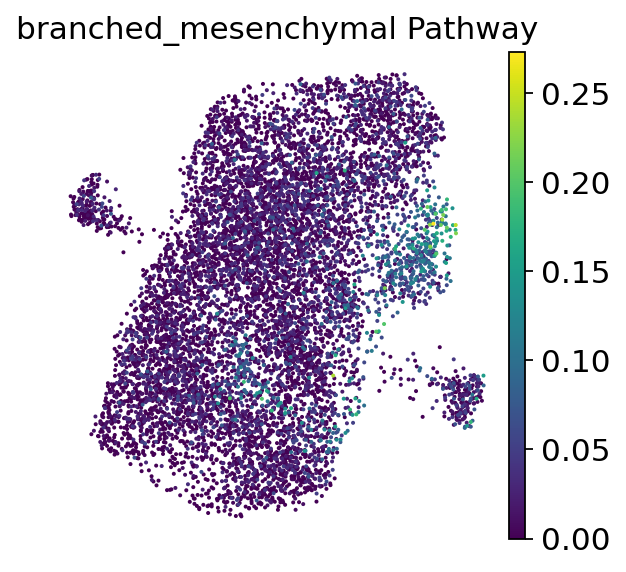

In [39]:
sc.pl.umap(
    adata,
    color=["branched_mesenchymal Pathway"],
    frameon=False,
    ncols=2,
    wspace = 0.4,
    save='/16992-2D/emp/UMAP_branched_mesenchymal_Pathway.pdf'
)
os.rename("figures/umap/16992-2D/emp/UMAP_branched_mesenchymal_Pathway.pdf", 
          "../results/task3/16992-2D_emp_UMAP_branched_mesenchymal_Pathway.pdf")

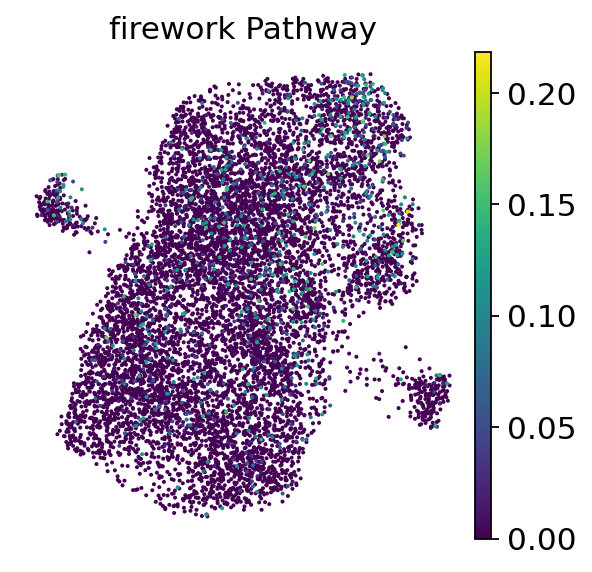

In [40]:
sc.pl.umap(
    adata,
    color=["firework Pathway"],
    frameon=False,
    ncols=2,
    wspace = 0.4,
    save='/16992-2D/emp/UMAP_firework_Pathway.pdf'
)
os.rename("figures/umap/16992-2D/emp/UMAP_firework_Pathway.pdf", 
          "../results/task3/16992-2D_emp_UMAP_firework_Pathway.pdf")

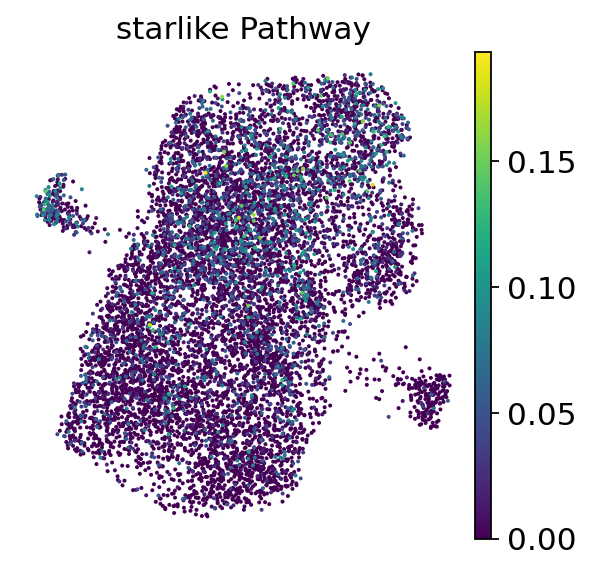

In [41]:
sc.pl.umap(
    adata,
    color=["starlike Pathway"],
    frameon=False,
    ncols=2,
    wspace = 0.4,
    save='/16992-2D/emp/UMAP_starlike_Pathway.pdf'
)
os.rename("figures/umap/16992-2D/emp/UMAP_starlike_Pathway.pdf", 
          "../results/task3/16992-2D_emp_UMAP_starlike_Pathway.pdf")

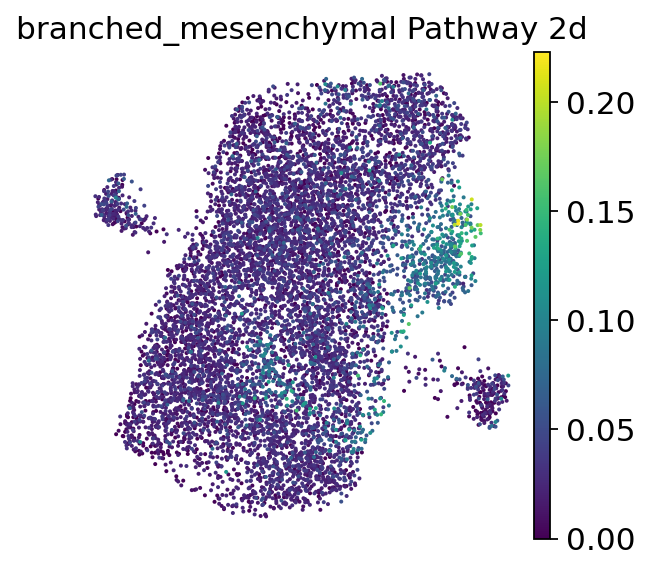

In [42]:
sc.pl.umap(
    adata,
    color=["branched_mesenchymal Pathway 2d"],
    frameon=False,
    ncols=2,
    wspace = 0.4,
    save='/16992-2D/emp/UMAP_branched_mesenchymal_Pathway2d.pdf'
)
os.rename("figures/umap/16992-2D/emp/UMAP_branched_mesenchymal_Pathway2d.pdf", 
          "../results/task3/16992-2D_emp_UMAP_branched_mesenchymal_Pathway2d.pdf")

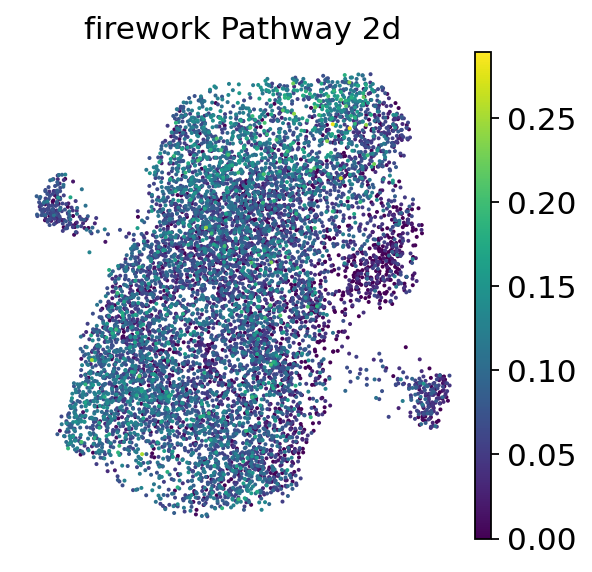

In [43]:
sc.pl.umap(
    adata,
    color=["firework Pathway 2d"],
    frameon=False,
    ncols=2,
    wspace = 0.4,
    save='/16992-2D/emp/UMAP_firework_Pathway2d.pdf'
)
os.rename("figures/umap/16992-2D/emp/UMAP_firework_Pathway2d.pdf", 
          "../results/task3/16992-2D_emp_UMAP_firework_Pathway2d.pdf")

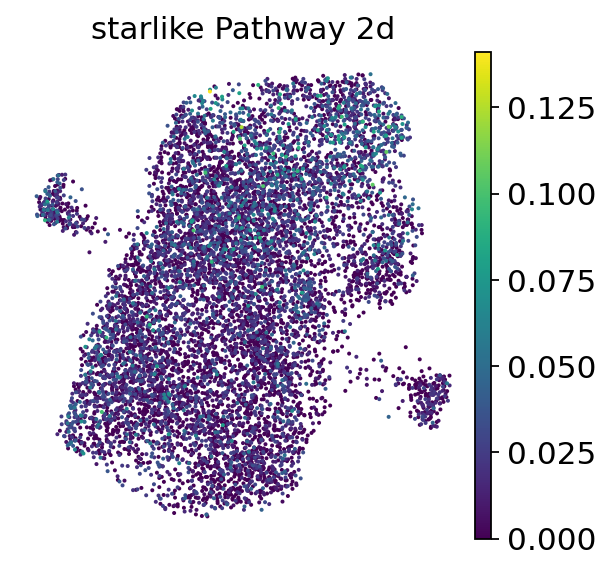

In [44]:
sc.pl.umap(
    adata,
    color=["starlike Pathway 2d"],
    frameon=False,
    ncols=2,
    wspace = 0.4,
    save='/16992-2D/emp/UMAP_starlike_Pathway2d.pdf'
)
os.rename("figures/umap/16992-2D/emp/UMAP_starlike_Pathway2d.pdf", 
          "../results/task3/16992-2D_emp_UMAP_starlike_Pathway2d.pdf")

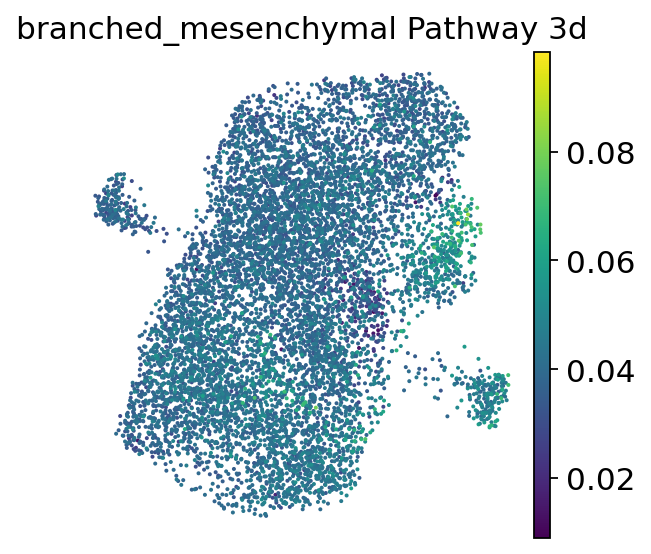

In [45]:
sc.pl.umap(
    adata,
    color=["branched_mesenchymal Pathway 3d"],
    frameon=False,
    ncols=2,
    wspace = 0.4,
    save='/16992-2D/emp/UMAP_branched_mesenchymal_Pathway3d.pdf'
)
os.rename("figures/umap/16992-2D/emp/UMAP_branched_mesenchymal_Pathway3d.pdf", 
          "../results/task3/16992-2D_emp_UMAP_branched_mesenchymal_Pathway3d.pdf")

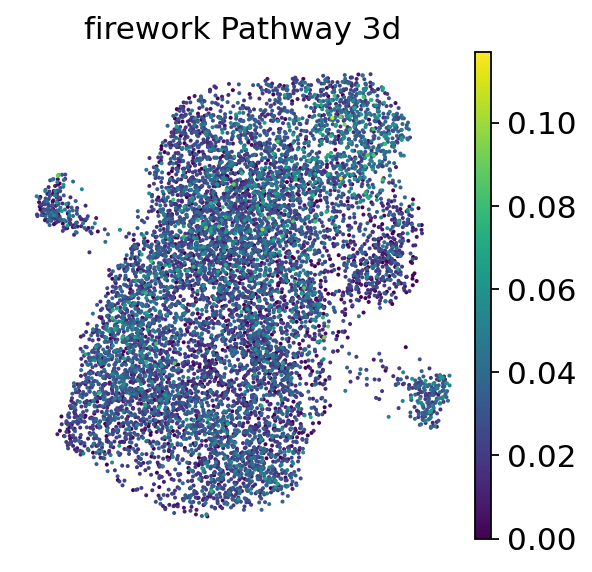

In [46]:
sc.pl.umap(
    adata,
    color=["firework Pathway 3d"],
    frameon=False,
    ncols=2,
    wspace = 0.4,
    save='/16992-2D/emp/UMAP_firework_Pathway3d.pdf'
)
os.rename("figures/umap/16992-2D/emp/UMAP_firework_Pathway3d.pdf", 
          "../results/task3/16992-2D_emp_UMAP_firework_Pathway3d.pdf")

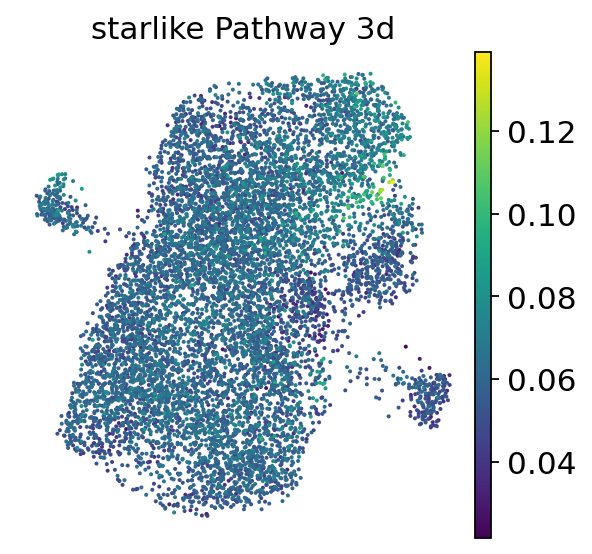

In [47]:
sc.pl.umap(
    adata,
    color=["starlike Pathway 3d"],
    frameon=False,
    ncols=2,
    wspace = 0.4,
    save='/16992-2D/emp/UMAP_starlike_Pathway3d.pdf'
)
os.rename("figures/umap/16992-2D/emp/UMAP_starlike_Pathway3d.pdf", 
          "../results/task3/16992-2D_emp_UMAP_starlike_Pathway3d.pdf")

## Violin

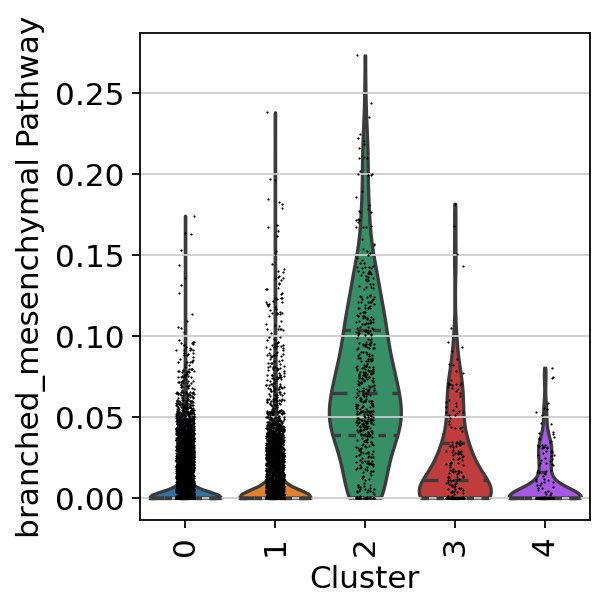

In [48]:
sc.pl.violin(adata, 
             keys=["branched_mesenchymal Pathway"],
             groupby='Cluster', 
             rotation=90,
             xlabel='Cluster',
             inner="quartile",
             wspace = 0.4,
             save='/16992-2D/emp_violin_counts_UMAP_branched_mesenchymal_Pathway.pdf'
            )
os.rename("figures/violin/16992-2D/emp_violin_counts_UMAP_branched_mesenchymal_Pathway.pdf", 
          "../results/task3/16992-2D_emp_violin_counts_UMAP_branched_mesenchymal_Pathway.pdf")

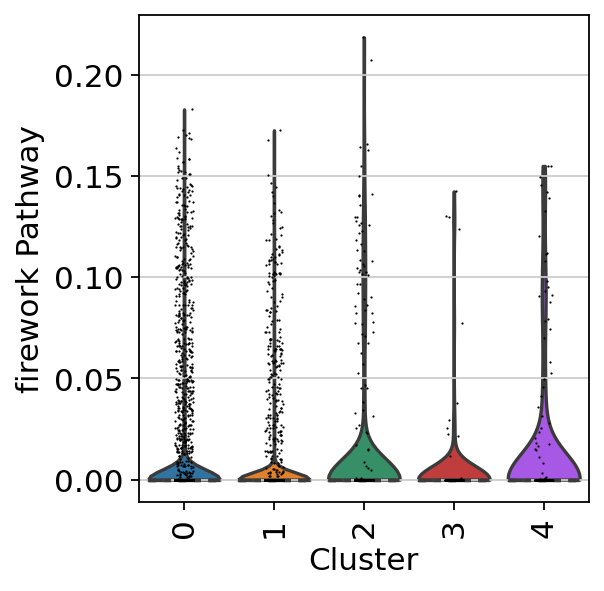

In [49]:
sc.pl.violin(adata, 
             keys=["firework Pathway"],
             groupby='Cluster', 
             rotation=90,
             xlabel='Cluster',
             inner="quartile",
             wspace = 0.4,
             save='/16992-2D/emp_violin_counts_firework_Pathway.pdf'
            )
os.rename("figures/violin/16992-2D/emp_violin_counts_firework_Pathway.pdf", 
          "../results/task3/16992-2D_emp_violin_counts_firework_Pathway.pdf")

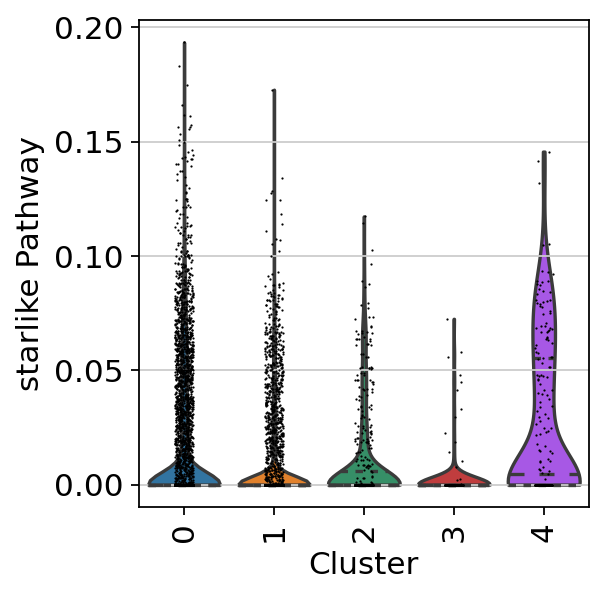

In [50]:
sc.pl.violin(adata, 
             keys=["starlike Pathway"],
             groupby='Cluster', 
             rotation=90,
             xlabel='Cluster',
             inner="quartile",
             wspace = 0.4,
             save='/16992-2D/emp_violin_counts_starlike_Pathway.pdf'
            )
os.rename("figures/violin/16992-2D/emp_violin_counts_starlike_Pathway.pdf", 
          "../results/task3/16992-2D_emp_violin_counts_starlike_Pathway.pdf")

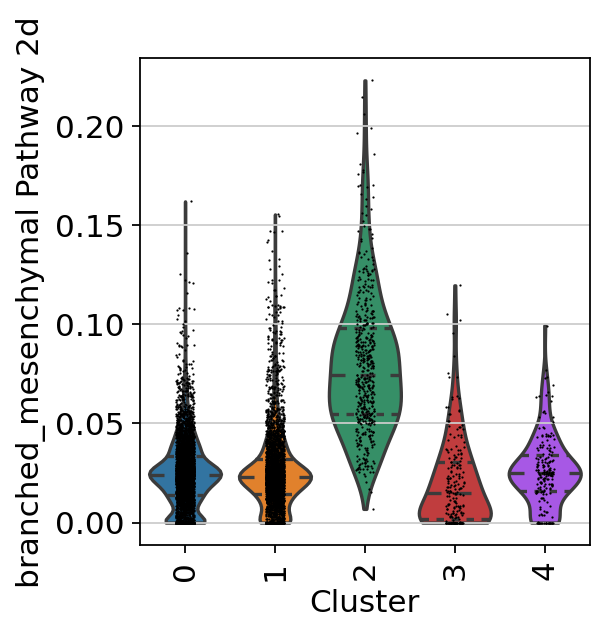

In [51]:
sc.pl.violin(adata, 
             keys=["branched_mesenchymal Pathway 2d"],
             groupby='Cluster', 
             rotation=90,
             xlabel='Cluster',
             inner="quartile",
             wspace = 0.4,
             save='/16992-2D/emp_violin_counts_UMAP_branched_mesenchymal_Pathway2d.pdf'
            )
os.rename("figures/violin/16992-2D/emp_violin_counts_UMAP_branched_mesenchymal_Pathway2d.pdf", 
          "../results/task3/16992-2D_emp_violin_counts_UMAP_branched_mesenchymal_Pathway2d.pdf")

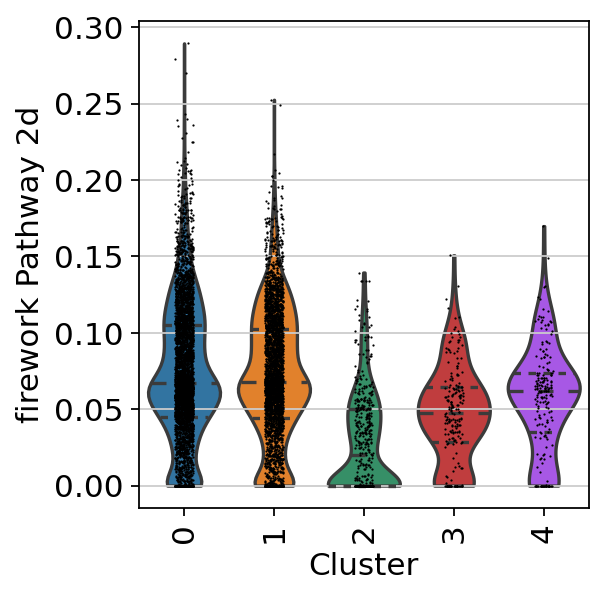

In [52]:
sc.pl.violin(adata, 
             keys=["firework Pathway 2d"],
             groupby='Cluster', 
             rotation=90,
             xlabel='Cluster',
             inner="quartile",
             wspace = 0.4,
             save='/16992-2D/emp_violin_counts_firework_Pathway2d.pdf'
            )
os.rename("figures/violin/16992-2D/emp_violin_counts_firework_Pathway2d.pdf", 
          "../results/task3/16992-2D_emp_violin_counts_firework_Pathway2d.pdf")

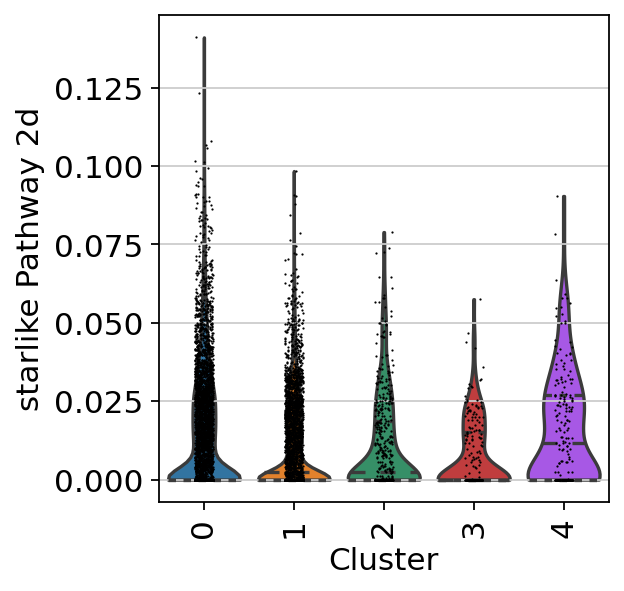

In [53]:
sc.pl.violin(adata, 
             keys=["starlike Pathway 2d"],
             groupby='Cluster', 
             rotation=90,
             xlabel='Cluster',
             inner="quartile",
             wspace = 0.4,
             save='/16992-2D/emp_violin_counts_starlike_Pathway2d.pdf'
            )
os.rename("figures/violin/16992-2D/emp_violin_counts_starlike_Pathway2d.pdf", 
          "../results/task3/16992-2D_emp_violin_counts_starlike_Pathway2d.pdf")

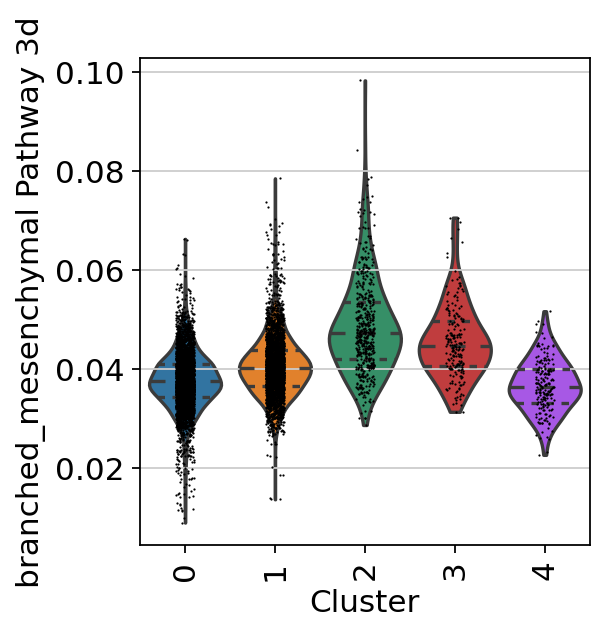

In [54]:
sc.pl.violin(adata, 
             keys=["branched_mesenchymal Pathway 3d"],
             groupby='Cluster', 
             rotation=90,
             xlabel='Cluster',
             inner="quartile",
             wspace = 0.4,
             save='/16992-2D/emp_violin_counts_UMAP_branched_mesenchymal_Pathway3d.pdf'
            )
os.rename("figures/violin/16992-2D/emp_violin_counts_UMAP_branched_mesenchymal_Pathway3d.pdf", 
          "../results/task3/16992-2D_emp_violin_counts_UMAP_branched_mesenchymal_Pathway3d.pdf")

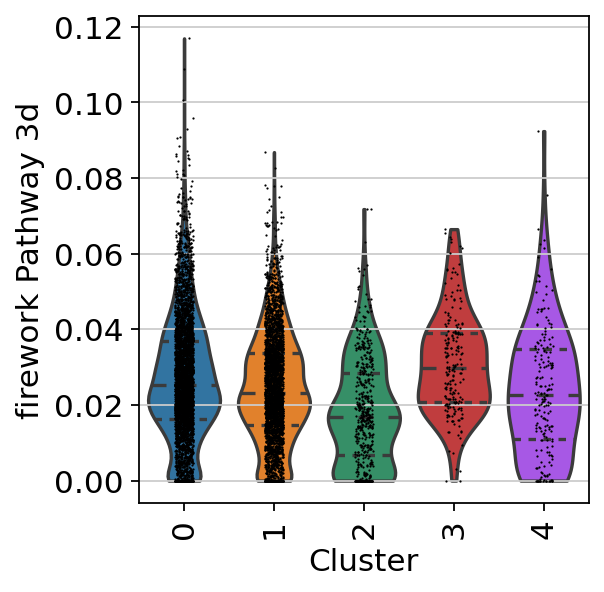

In [55]:
sc.pl.violin(adata, 
             keys=["firework Pathway 3d"],
             groupby='Cluster', 
             rotation=90,
             xlabel='Cluster',
             inner="quartile",
             wspace = 0.4,
             save='/16992-2D/emp_violin_counts_firework_Pathway3d.pdf'
            )
os.rename("figures/violin/16992-2D/emp_violin_counts_firework_Pathway3d.pdf", 
          "../results/task3/16992-2D_emp_violin_counts_firework_Pathway3d.pdf")

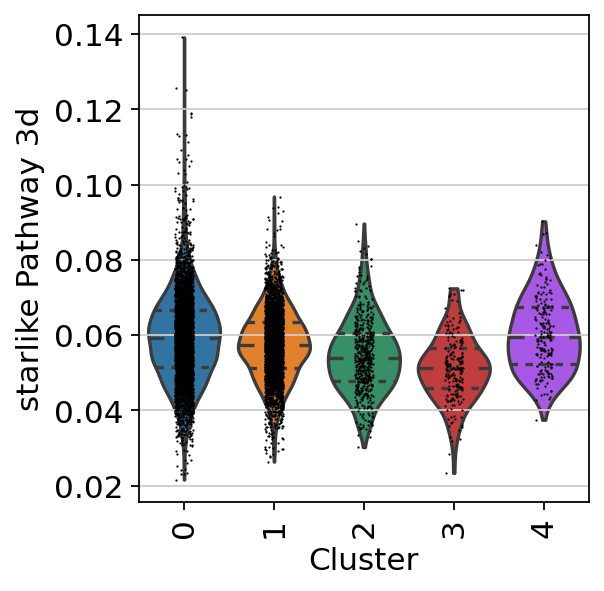

In [56]:
sc.pl.violin(adata, 
             keys=["starlike Pathway 3d"],
             groupby='Cluster', 
             rotation=90,
             xlabel='Cluster',
             inner="quartile",
             wspace = 0.4,
             save='/16992-2D/emp_violin_counts_starlike_Pathway3d.pdf'
            )
os.rename("figures/violin/16992-2D/emp_violin_counts_starlike_Pathway3d.pdf", 
          "../results/task3/16992-2D_emp_violin_counts_starlike_Pathway3d.pdf")